# Laboratory Work: Chickenpox Propagation Prediction/Forecasting

- The objective of this Laboratry Work is to put in application time series data forecasting using a **Deep Neural Network**. For that it is nececssary to learn the model behind the time series data giving the relation between output, input, and their past and future values as given in the relation below:
$$y(k+p)=F(y(k),y(k-1),\ldots,y(k-d_y), u(k),u(k-1),u(k-2),\ldots,u(k-d_u))$$
where:
    - $y(k)$: is the output predicted signal
    - $u(k)$: is the input signal
    - $p$: is the prediction horizont
    - $d_y$: is the output memory/delay order or output prediction order 
    - $d_u$: is the input memory/delay order  or input prediction order 
- In our application  $p>0$, $d_u=0$ and $d_y>0$
- We will resolve this prediction problem by transforming the related recurrent Neural Network to a feedforword Neural Network and using the learning algorithms and tools provided by Keras toolbox. So if we consider that we have a learning base given by $u(k), y(k), k=1,2,\ldots, n $ we have to create one input signal from input learning base $u(k)$ and $d_y+1$ input signal coming from $y(k)$ and its $d_y$  delayed signals. We can begin the prediction learning with $p=1$, $d_y=7$ and $d_u=0$ as given in the construction of learning base in section *Data Base*.
- **Work to be done**:
    - For different perdiction horizon $p\in{1,2,3}$ and memory/predictor order $d_y\in{7,8,9,10}$ propose a Neural Network  architecture, operate the learning phase, give the results of testing phase and make some conclusions wrt accuracy.
    - **Optional**: Propose an implementation of Back Propogation algorithm to operate the learning phase.
    - **Optional**: Propose other Neuronal Network architecture like SimpleRNN, GRU or LSTM to implement and operate the learning and compare your results with the feedforward architecture given above.
    - Genral conclusion
- **A report** on the Laboratory Work has to be written in **Jupyter** or in any other editor.
- **The report** as well as **Jupyter report and code** has to be uploaded to Blackboard  **before 24 of April 2022**  specifying the name of persons involved (**which has to be at maximun two**). The name of the persons involved has to be given in the report also.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import activations

# Data Base
- The example trains an **Deep neural Network** to forecast the number of chickenpox cases, taken from the data set **chickenpox_dataset**, given the number of cases in previous months
- Load the example data from **data_chickenpox.txt** text file which contains a single time series, with time steps corresponding to months and values corresponding to the number of cases 
- Construct the input **Deep Neural Network** input w.r.t delay order or output prediction order
- Split the data in **Training Set**, **Validation Set** and **Test Set**
- $nn_0$ gives the output prediction order or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

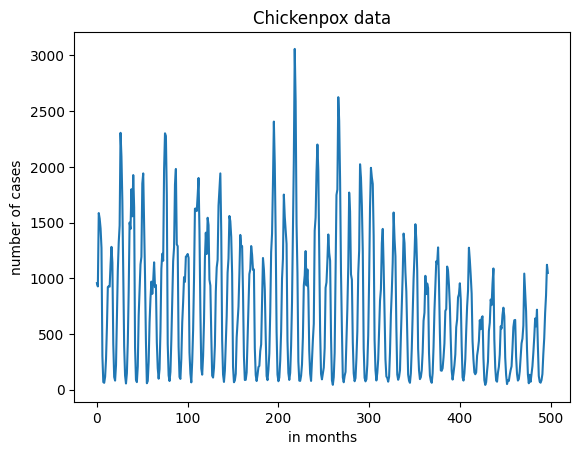

(490, 8)
(490, 1)


In [9]:
S= np.loadtxt('data_chickenpox.txt')
n=len(S)
plt.plot(S)
plt.title('Chickenpox data')
plt.xlabel('in months')
plt.ylabel('number of cases')
plt.show()

p=1                                      
dy=7                                     
nn_0=dy+1                                
nn_1=10                                  
nn_2=1                                      
y=S

V=y[dy:len(y)-p,]
for i in range(1, dy+1):
    V=np.c_[V,y[dy-i:len(y)-p-i,]]   

T=np.mat(y[dy+p:len(y),]).T
print(V.shape)
print(T.shape)
input_NN=V[:400,:]
target_NN=T[:400,]
input_Test=V[400:,:]
target_Test=T[400:,]


# Standardize Data
For a better fit and to prevent the training from diverging, standardize the training data to have zero mean and unit variance. Standardize the test data using the same parameters as the training data.

In [10]:
input_mean = np.mean(input_NN)
target_mean = np.mean(target_NN)
input_std = np.std(input_NN)
target_std = np.std(target_NN)

input_NN = (input_NN - input_mean) / input_std
target_NN = (target_NN - input_mean) / target_std
input_Test = (input_Test - input_mean) / input_std
target_Test = (target_Test - target_mean) / target_std

# Deep Neural Network Architecture
- Define the type of DNN: In our case we have chosen the **Sequential** DNN
- Define the type of activation function for each layer (**linear,relu,linear** in our case)
- Define the learning/optimization method used (**RMSprop** in our case)
- Define the criteria to minimize and the related metric (**MSE** and **'mae'** in our case)
- Define the **batch size** and the number of **epochs** (**batch_size=4, epochs=50** in our case)
- $nn_0$ gives the prediction order or number of neurons in the input layer
- $nn_1$ gives the number of neurons in the hidden layer
- $nn_2$ gives the number of neurons in the output layer     

In [11]:
model = models.Sequential()

model.add(layers.Dense(nn_0, activation=activations.linear))
model.add(layers.Dense(nn_1, activation=activations.relu))
model.add(layers.Dense(nn_2, activation=activations.linear))

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.mean_squared_error, metrics=[metrics.mean_absolute_error])

history = model.fit(input_NN, target_NN, epochs=50, batch_size=4, validation_data=(input_Test, target_Test))

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 1.3141 - mean_absolute_error: 0.9115 - val_loss: 0.2070 - val_mean_absolute_error: 0.3689
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3403 - mean_absolute_error: 0.4342 - val_loss: 0.2621 - val_mean_absolute_error: 0.4272
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2427 - mean_absolute_error: 0.3677 - val_loss: 0.1599 - val_mean_absolute_error: 0.3102
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.2007 - mean_absolute_error: 0.3345 - val_loss: 0.1276 - val_mean_absolute_error: 0.2708
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1758 - mean_absolute_error: 0.3138 - val_loss: 0.0895 - val_mean_absolute_error: 0.2274
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1589 - mean_absolute_error: 0.2955 - val_loss: 0.0804 - val_mean_absolute_error: 0.2133
Epoch 7/50
100/1

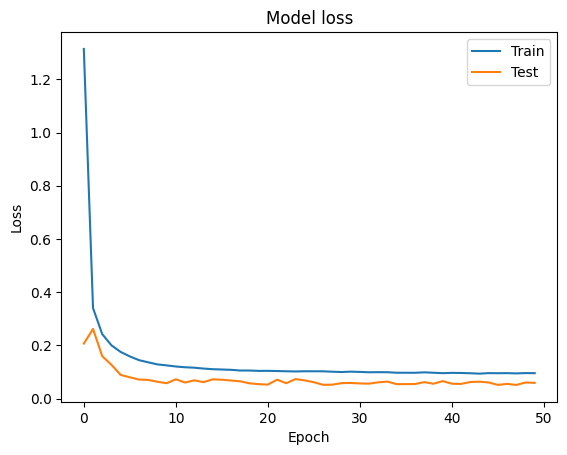

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

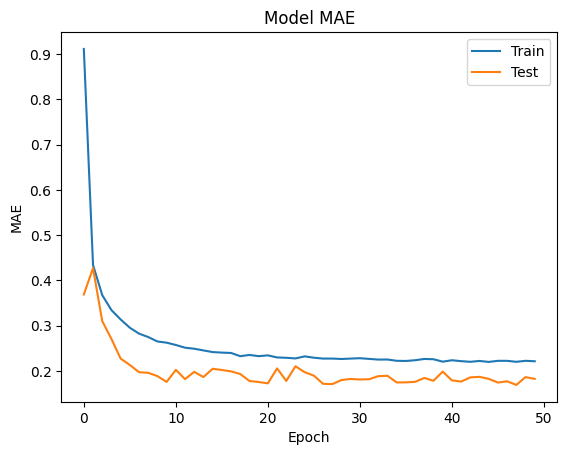

In [13]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Now we will parametrize the model to vary the prediction horizon $p$ and the output prediction order $d_y$.

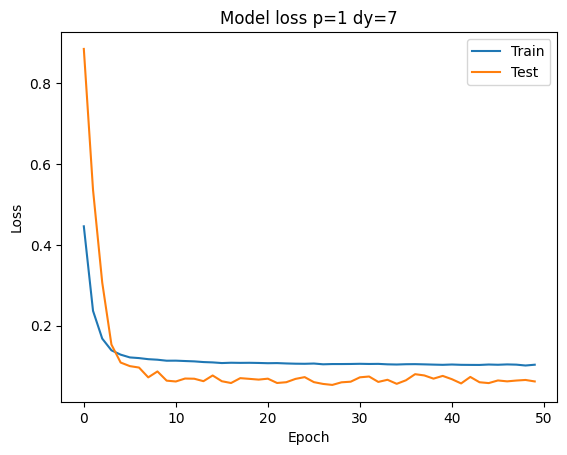

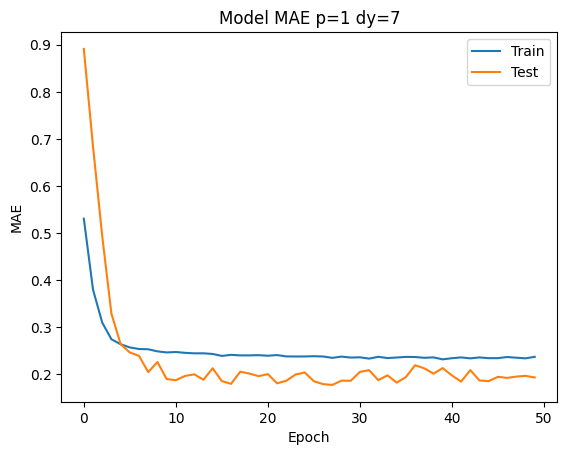

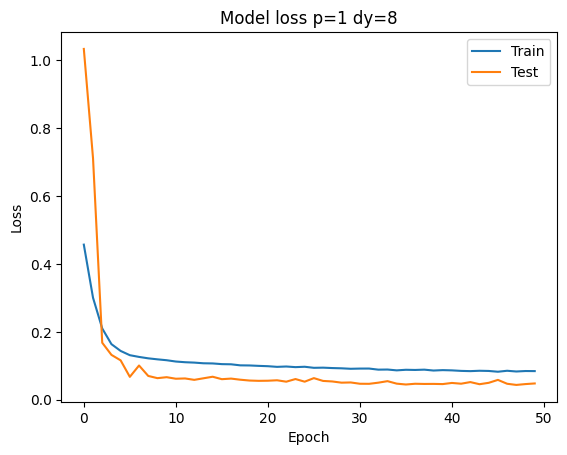

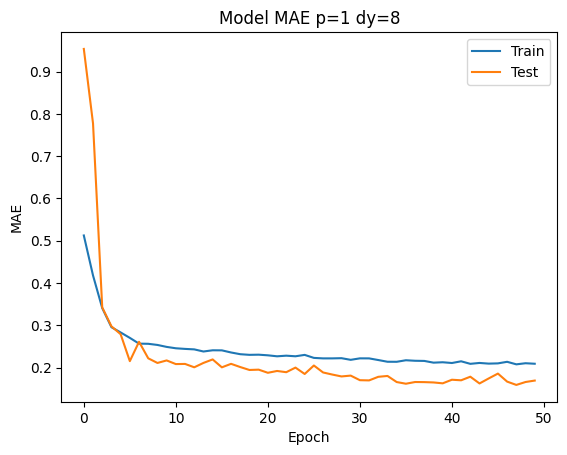

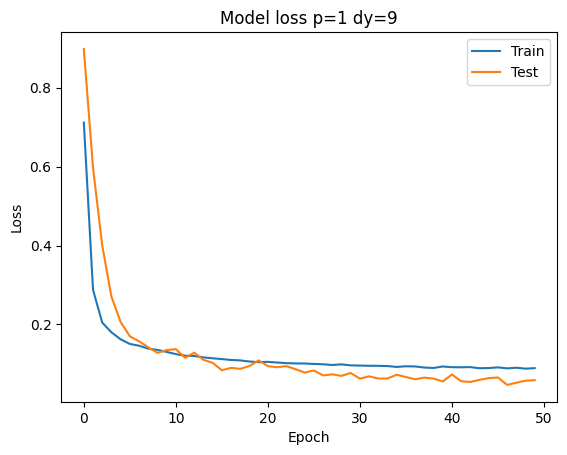

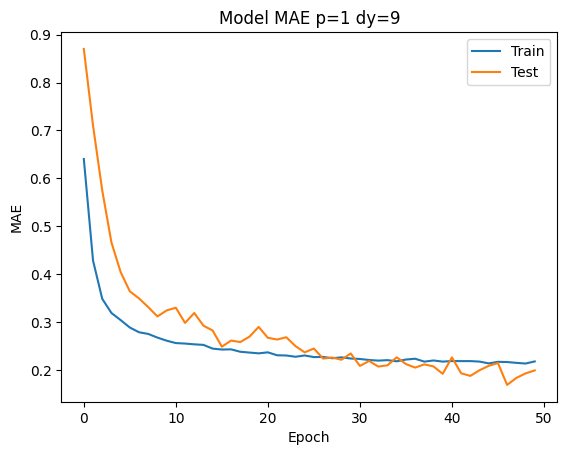

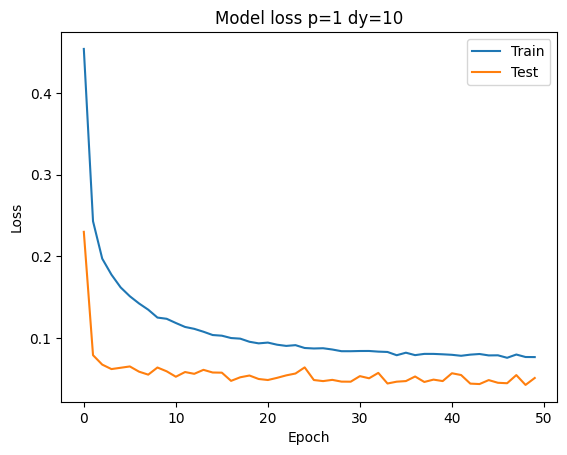

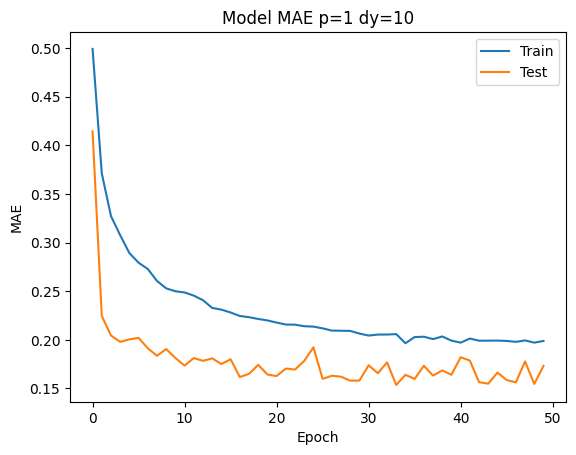

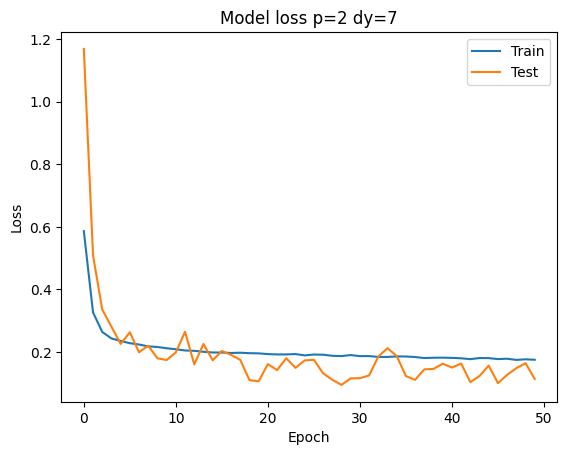

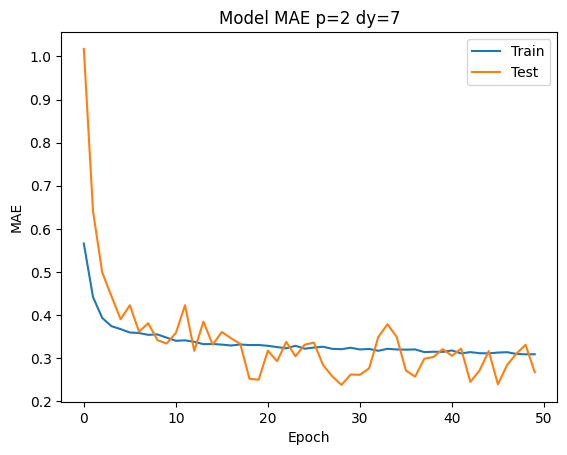

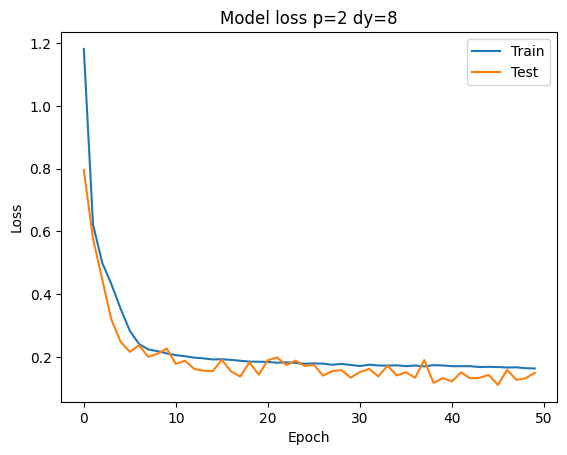

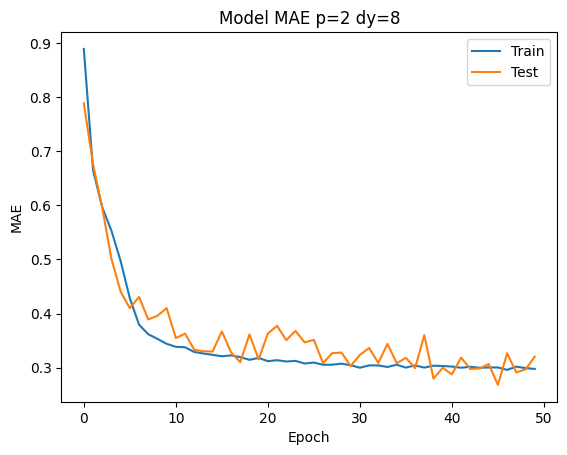

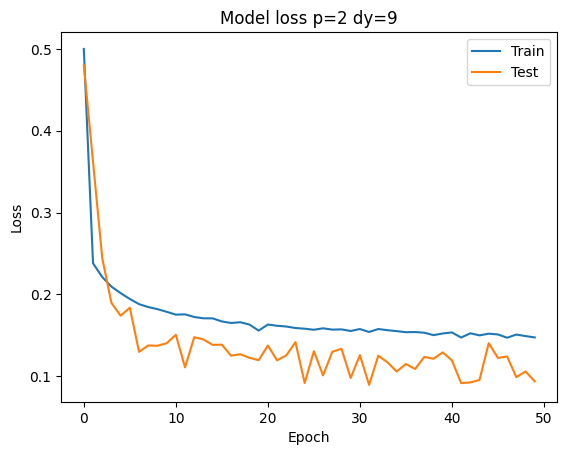

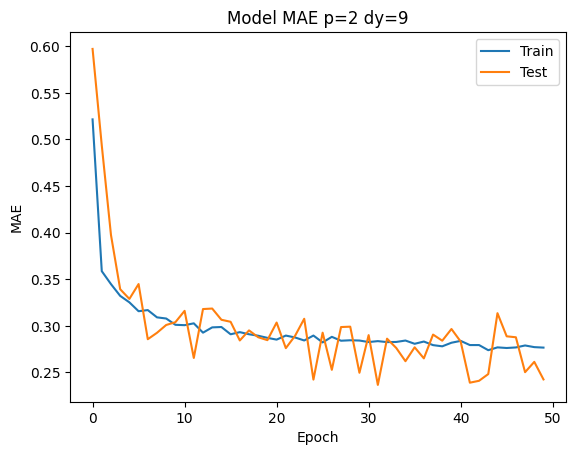

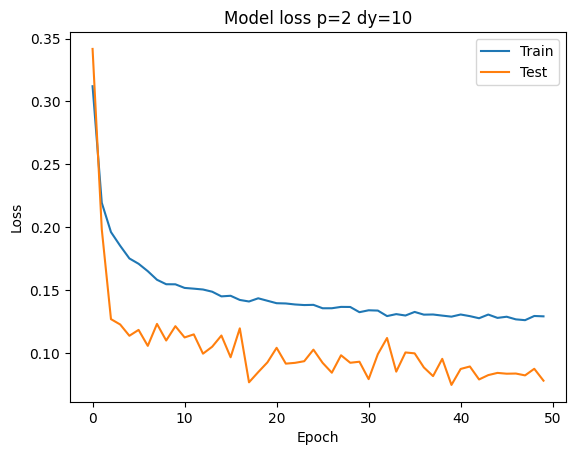

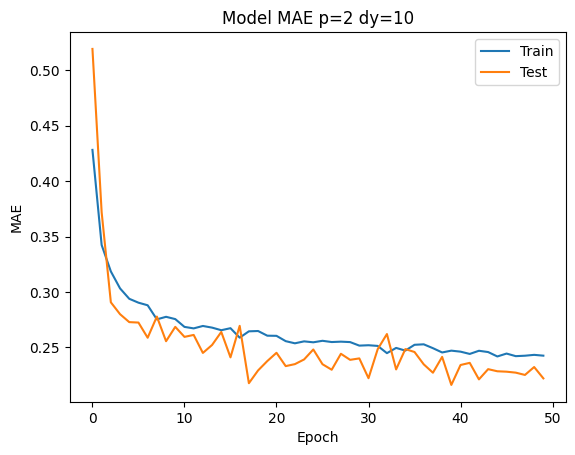

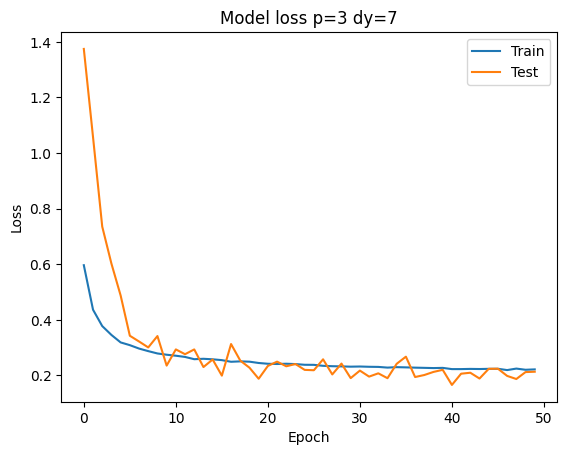

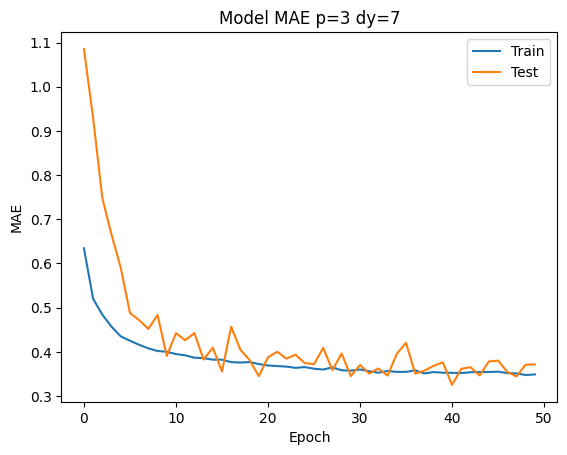

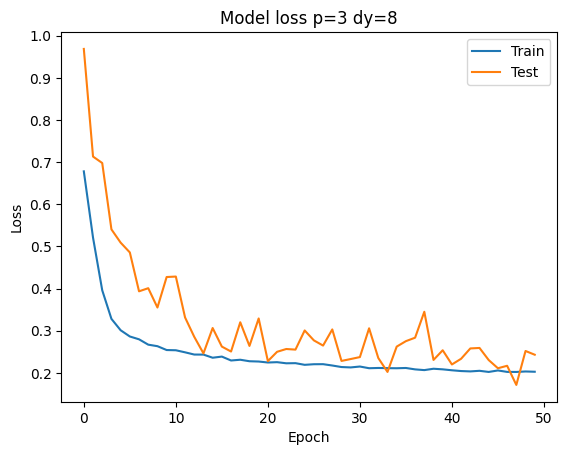

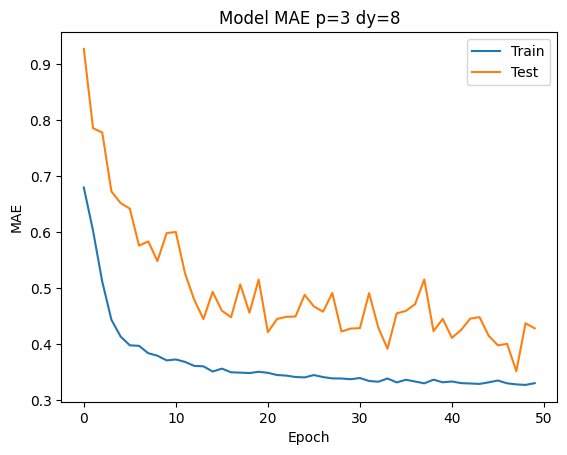

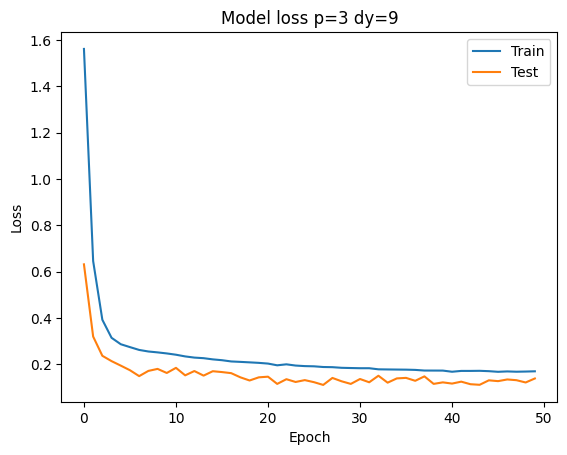

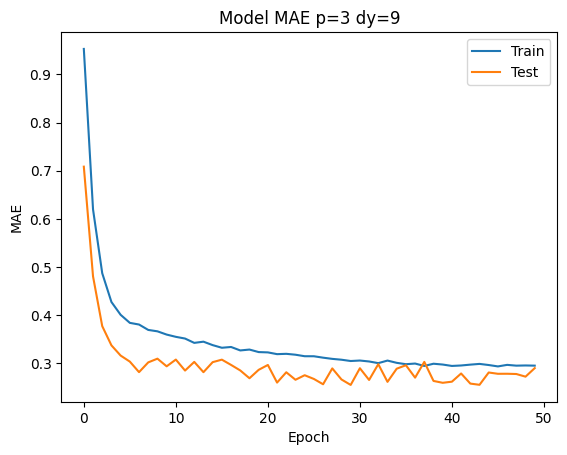

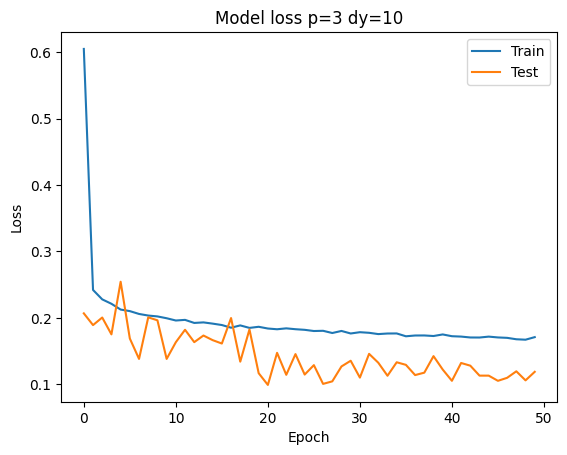

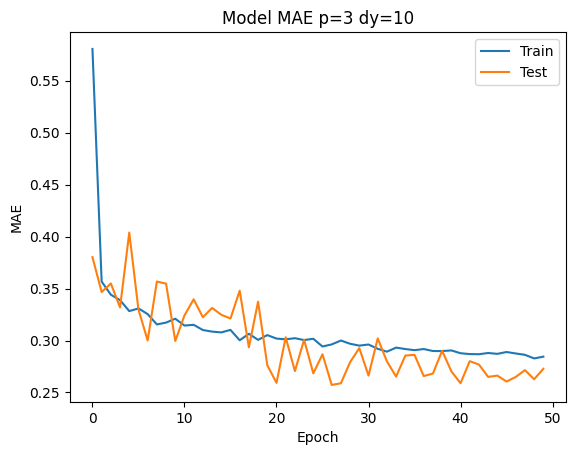

In [15]:
def neural_network(p, dy):                                 
    nn_0=dy+1                              
    nn_1=10                                  
    nn_2=1                                   
    y=S

    V=y[dy:len(y)-p,]
    for i in range(1, dy+1):
        V=np.c_[V,y[dy-i:len(y)-p-i,]]   

    T=np.mat(y[dy+p:len(y),]).T

    input_NN=V[:400,:]
    target_NN=T[:400,]
    input_Test=V[400:,:]
    target_Test=T[400:,]

    input_mean = np.mean(input_NN)
    target_mean = np.mean(target_NN)
    input_std = np.std(input_NN)
    target_std = np.std(target_NN)

    input_NN = (input_NN - input_mean) / input_std
    target_NN = (target_NN - input_mean) / target_std
    input_Test = (input_Test - input_mean) / input_std
    target_Test = (target_Test - target_mean) / target_std

    model = models.Sequential()

    model.add(layers.Dense(nn_0, activation=activations.linear))
    model.add(layers.Dense(nn_1, activation=activations.relu))
    model.add(layers.Dense(nn_2, activation=activations.linear))

    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.mean_squared_error, metrics=[metrics.mean_absolute_error])

    history = model.fit(input_NN, target_NN, epochs=50, batch_size=4, validation_data=(input_Test, target_Test), verbose=0)

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss p={} dy={}'.format(p, dy))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model MAE p={} dy={}'.format(p, dy))
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

for p in range(1, 4):
    for dy in range(7, 11):
        neural_network(p, dy)

# Conclusion